<a href="https://colab.research.google.com/github/VadorInPython/Bachelor_Thesis/blob/main/Bachelor_thesis_working_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import pakietów**

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import os
import opendatasets as od
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
#import PIL
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#**Wczytanie danych**

In [3]:
pics = od.download("https://www.kaggle.com/datasets/a2015003713/militaryaircraftdetectiondataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: szymonderlecki
Your Kaggle Key: ··········


100%|██████████| 10.0G/10.0G [01:26<00:00, 124MB/s]


In [4]:
set = '/content/militaryaircraftdetectiondataset/crop'

#**Przetworzenie danych pod sieć**

In [5]:
main_set = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory = set, target_size = (360, 360), classes = ['A10', 'A400M', 'AG600', 'AV8B', 'B1', 'B2', 'B52',
                                                                                        'Be200', 'C2', 'C5', 'C17', 'C130', 'E2', 'E7', 
                                                                                        'EF2000', 'F4', 'F14', 'F15', 'F16', 'F18'
                                                                                        'F22', 'F35', 'F117', 'J20', 'JAS39', 'Mig31',
                                                                                        'Mirage2000', 'MQ9', 'P3', 'Rafale', 'RQ4', 'SR71',
                                                                                        'Su34', 'Su57', 'Tornado', 'Tu95', 'Tu160', 
                                                                                        'U2', 'US2', 'V22', 'Vulcan', 'XB70', 'YF23'], batch_size = 10)

Found 16337 images belonging to 42 classes.


In [6]:
pics, labels = next(main_set)

In [7]:
#Niżej tylko testowa funkcaj ze strony tensorflow, raczej sprobuje napisac cos zeby tylko jedno losowe zdjecie wyswietlac jesli

In [8]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20, 20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

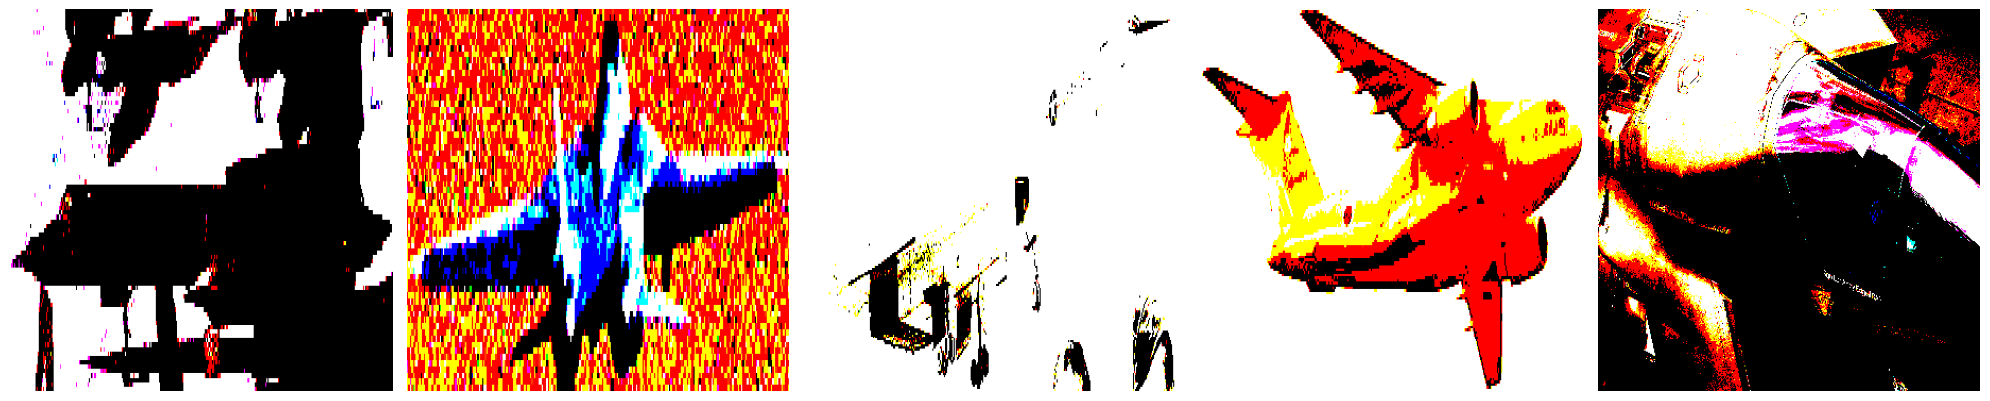

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0

In [9]:
plotImages(pics)
print(labels)

#<b>Stworzenie setu treningowego</b>



In [10]:
train_set = image_dataset_from_directory(set,
                                        image_size = (360, 360),
                                        validation_split = 0.2,
                                        subset = "training",
                                        shuffle = True,
                                        batch_size = 10,
                                        seed = 123)

Found 17906 files belonging to 43 classes.
Using 14325 files for training.


#<b>Stworzenie setu testowego</b>

In [11]:
test_set = image_dataset_from_directory(set,
                                        image_size = (360, 360),
                                        validation_split = 0.7,
                                        subset = "training",
                                        shuffle = True,
                                        batch_size = 10,
                                        seed = 123)

Found 17906 files belonging to 43 classes.
Using 5372 files for training.


#<b>Stworzenie setu walidacyjnego</b>

In [12]:
val_set = image_dataset_from_directory(set,
                                        image_size = (360, 360),
                                        validation_split = 0.9,
                                        subset = "training",
                                        shuffle = True,
                                        batch_size = 10,
                                        seed = 123)

Found 17906 files belonging to 43 classes.
Using 1791 files for training.


#**Implementacja sieci CNN**

In [13]:
md = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (360, 360, 3)),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
    layers.Flatten(),
    layers.Dense(units = 43, activation = 'softmax')])


In [14]:
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 360, 360, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 180, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 259200)            0         
                                                                 
 dense (Dense)               (None, 43)                1

In [15]:
md.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [ ]:
#niżej trzeba będzie użyć splita, żeby stworzyć walidacyjny zestaw zdjęć

In [16]:
md.fit(x = train_set, validation_data = val_set, epochs = 10, verbose = 2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1433/1433 - 1913s - loss: 19.8127 - accuracy: 0.0565 - val_loss: 3.5998 - val_accuracy: 0.0748 - 1913s/epoch - 1s/step
Epoch 2/10
1433/1433 - 1935s - loss: 3.4403 - accuracy: 0.1123 - val_loss: 3.2626 - val_accuracy: 0.1803 - 1935s/epoch - 1s/step
Epoch 3/10
1433/1433 - 1947s - loss: 3.0672 - accuracy: 0.2113 - val_loss: 2.9530 - val_accuracy: 0.2513 - 1947s/epoch - 1s/step
Epoch 4/10
1433/1433 - 1930s - loss: 2.7192 - accuracy: 0.3059 - val_loss: 2.7618 - val_accuracy: 0.3188 - 1930s/epoch - 1s/step
Epoch 5/10
1433/1433 - 1889s - loss: 2.5308 - accuracy: 0.3644 - val_loss: 2.6565 - val_accuracy: 0.3233 - 1889s/epoch - 1s/step
Epoch 6/10
1433/1433 - 1933s - loss: 2.3126 - accuracy: 0.4135 - val_loss: 3.0035 - val_accuracy: 0.3244 - 1933s/epoch - 1s/step
Epoch 7/10
1433/1433 - 1924s - loss: 2.1384 - accuracy: 0.4586 - val_loss: 5.1883 - val_accuracy: 0.2920 - 1924s/epoch - 1s/step
Epoch 8/10
1433/1433 - 1927s - loss: 2.0845 - accuracy: 0.4792 - val_loss: 6.3349 - val_accuracy: 0.3177 - 

#*Poprawa accuracy wymagana*

#**Predykcje**

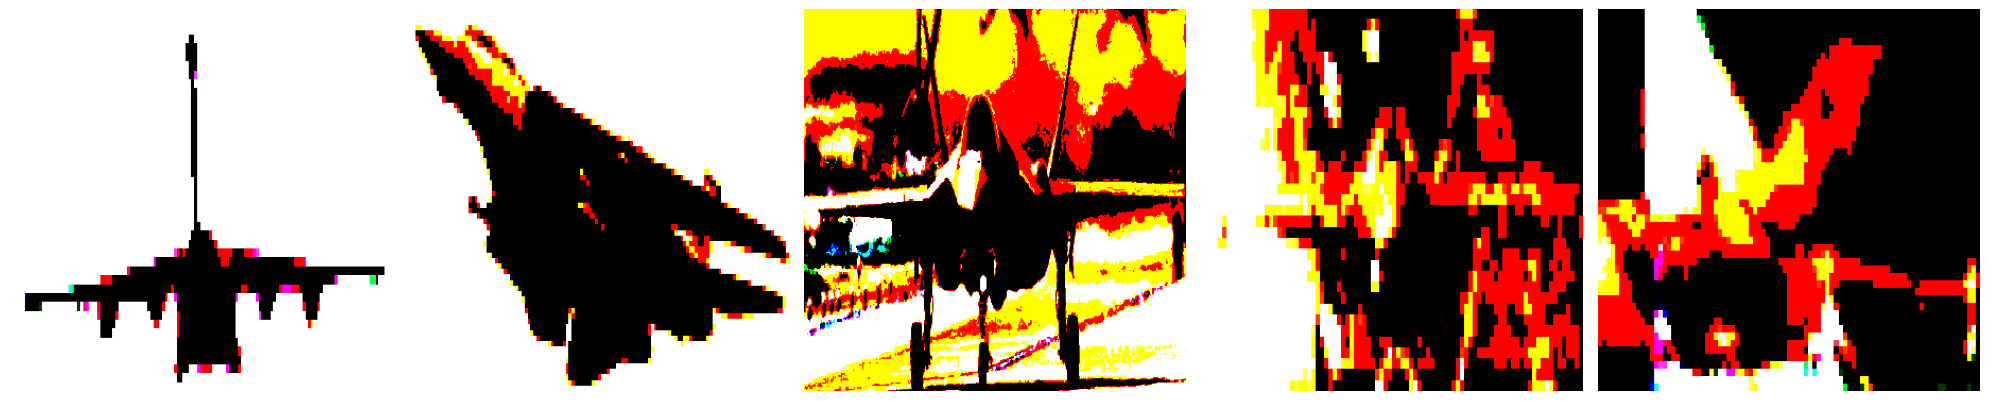

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0

In [19]:
test_pics, test_labels = next(main_set)
plotImages(test_pics)
print(test_labels)

In [23]:
main_set.classes

array([ 0,  0,  0, ..., 41, 41, 41], dtype=int32)

In [26]:
pred = md.predict(x=test_set, verbose = 0)

In [27]:
np.round(pred)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
pred = md.predict(x=main_set, verbose = 0)

In [29]:
np.round(pred)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
cm = confusion_matrix(y_true = main_set.classes, y_pred = np.argmax(pred, axis = -1))